Install opendatasets

In [ ]:
!pip install opendatasets

Import the dataset for cities of chicago

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/bmidataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krishnasankarmaharaj
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/bmidataset


100%|██████████| 2.19k/2.19k [00:00<00:00, 3.74MB/s]

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Load the Dataset

In [ ]:
df = pd.read_csv("/content/bmidataset/bmi.csv")
df.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Explore and Clean

In [ ]:
print(df.info())
print(df.isnull().sum())     # check missing values
print(df['Gender'].value_counts())
print(df['Index'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB
None
Gender    0
Height    0
Weight    0
Index     0
dtype: int64
Gender
Female    255
Male      245
Name: count, dtype: int64
Index
5    198
4    130
2     69
3     68
1     22
0     13
Name: count, dtype: int64


Encode Gender (Male-0, Female-1)

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

SCale Height and Weight

In [ ]:
scaler = StandardScaler()
df[['Height', 'Weight']] = scaler.fit_transform(df[['Height', 'Weight']])

Split Data

In [ ]:
X = df[['Gender', 'Height', 'Weight']]
y = df['Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Classifier

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate Model

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.67      1.00      0.80         4
           2       0.94      0.83      0.88        18
           3       0.70      0.88      0.78         8
           4       0.92      0.77      0.84        30
           5       0.88      0.95      0.91        39

    accuracy                           0.87       100
   macro avg       0.85      0.90      0.87       100
weighted avg       0.88      0.87      0.87       100



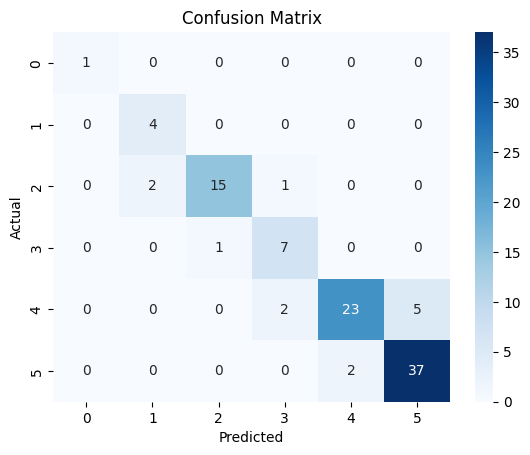

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Inference

In [ ]:
sample = pd.DataFrame([[0, (165 - df['Height'].mean()) / df['Height'].std(),
                             (65 - df['Weight'].mean()) / df['Weight'].std()]],
                      columns=['Gender', 'Height', 'Weight'])

bmi_class = model.predict(sample)[0]
print("Predicted BMI Category:", bmi_class)

Predicted BMI Category: 5
